In [1]:
import regionmask
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Read files

In [2]:
box=xr.open_dataset("polygon_box.nc")
triangle=xr.open_dataset("polygon_triangle.nc")
multipolys=xr.open_dataset("polygon_multipolys.nc")

shp_box=gpd.read_file('polygon_box.geojson')
shp_triangle=gpd.read_file('polygon_triangle.geojson')
shp_multipolys=gpd.read_file('polygon_multipolys.geojson')

<AxesSubplot:xlabel='lon', ylabel='lat'>

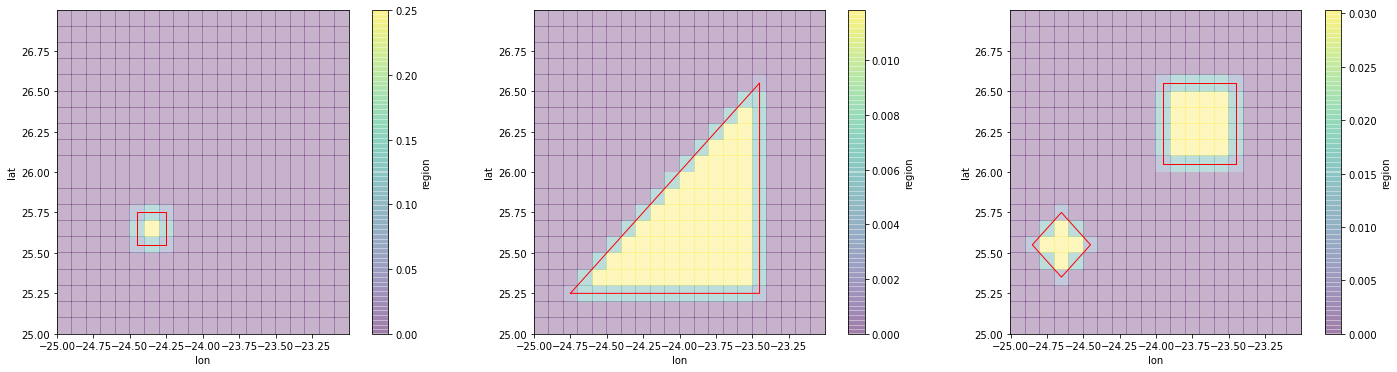

In [3]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
box.region.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
triangle.region.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
multipolys.region.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 

# Mask Shapes with Regionmask

In [4]:
my_box=regionmask.mask_geopandas(shp_box, box.lon, box.lat, method="weights_default")
my_triangle=regionmask.mask_geopandas(shp_triangle, triangle.lon, triangle.lat, method="weights_default")

polygon=[shp_multipolys[shp_multipolys["Name"]=="poly1"],shp_multipolys[shp_multipolys["Name"]=="poly2"]]
my_multipolys=regionmask.mask_geopandas(polygon, multipolys.lon, multipolys.lat, method="weights_default")

<AxesSubplot:xlabel='lon', ylabel='lat'>

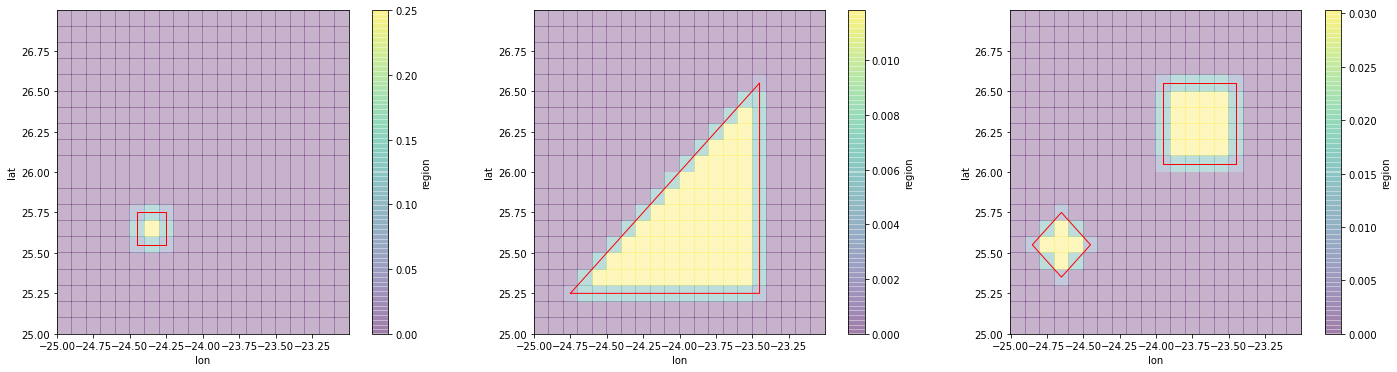

In [5]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
my_box.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
my_triangle.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
my_multipolys.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 